In [97]:
import pandas as pd
import numpy as np
import sklearn.ensemble as ens
import sklearn.model_selection as ms
import sklearn.preprocessing as pre
import sklearn.feature_selection as fs
import sklearn.metrics as met
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [56]:
data = pd.read_csv("titanic.csv")
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [57]:
data["age"].astype("float64")

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [58]:
data.drop(["embark_town", "deck", "class", "alive",], axis=1, inplace=True)

In [59]:
from warnings import filterwarnings
filterwarnings("ignore")
# data["age"].loc[data["who"] == "man"].mean() # 33.173
# data["age"].loc[data["who"] == "woman"].mean() # 32.0
# data["age"].loc[data["who"] == "child"].mean() # 6.369

data["age"].loc[(data["age"].isnull() == True) & (data["who"] == "man")] = 33.173
data["age"].loc[(data["age"].isnull() == True) & (data["who"] == "woman")] = 32.0
data["age"].loc[(data["age"].isnull() == True) & (data["who"] == "child")] = 6.369
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,man,True,False
1,1,1,female,38.0,1,0,71.2833,C,woman,False,False
2,1,3,female,26.0,0,0,7.9250,S,woman,False,True
3,1,1,female,35.0,1,0,53.1000,S,woman,False,False
4,0,3,male,35.0,0,0,8.0500,S,man,True,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,man,True,True
887,1,1,female,19.0,0,0,30.0000,S,woman,False,True
888,0,3,female,32.0,1,2,23.4500,S,woman,False,False
889,1,1,male,26.0,0,0,30.0000,C,man,True,True


In [65]:
data.dropna(inplace=True)

In [66]:
sex = pre.LabelEncoder()
sex.fit(data["sex"])
data["sex"] = sex.transform(data["sex"])
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
0,0,3,1,22.0,1,0,7.2500,S,man,True,False
1,1,1,0,38.0,1,0,71.2833,C,woman,False,False
2,1,3,0,26.0,0,0,7.9250,S,woman,False,True
3,1,1,0,35.0,1,0,53.1000,S,woman,False,False
4,0,3,1,35.0,0,0,8.0500,S,man,True,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,man,True,True
887,1,1,0,19.0,0,0,30.0000,S,woman,False,True
888,0,3,0,32.0,1,2,23.4500,S,woman,False,False
889,1,1,1,26.0,0,0,30.0000,C,man,True,True


In [68]:
sex = pre.LabelEncoder()
sex.fit(data["sex"])
data["sex"] = sex.transform(data["sex"])

embarked = pre.LabelEncoder()
embarked.fit(data["embarked"])
data["embarked"] = embarked.transform(data["embarked"])

who = pre.LabelEncoder()
who.fit(data["who"])
data["who"] = who.transform(data["who"])

adult_male = pre.LabelEncoder()
adult_male.fit(data["adult_male"])
data["adult_male"] = adult_male.transform(data["adult_male"])

alone = pre.LabelEncoder()
alone.fit(data["alone"])
data["alone"] = alone.transform(data["alone"])

In [89]:
X = data.iloc[:, 1:]
y = data["survived"]
X_train, X_test, y_train, y_test = ms.train_test_split(X,y, test_size=0.2)
model = ens.RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [90]:
y_pred = model.predict(X_test)
print(met.accuracy_score(y_test, y_pred))

0.8089887640449438


In [91]:
print(model.feature_importances_)

[0.09871425 0.09177067 0.22321388 0.0499459  0.02882211 0.25093724
 0.03238203 0.06853701 0.13924408 0.01643283]


<AxesSubplot:>

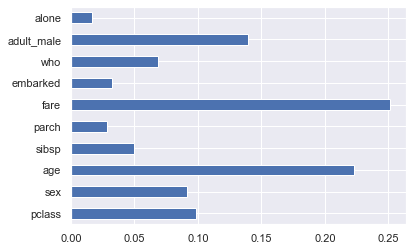

In [94]:
pd.Series(model.feature_importances_, X.columns).plot(kind="barh")

<AxesSubplot:>

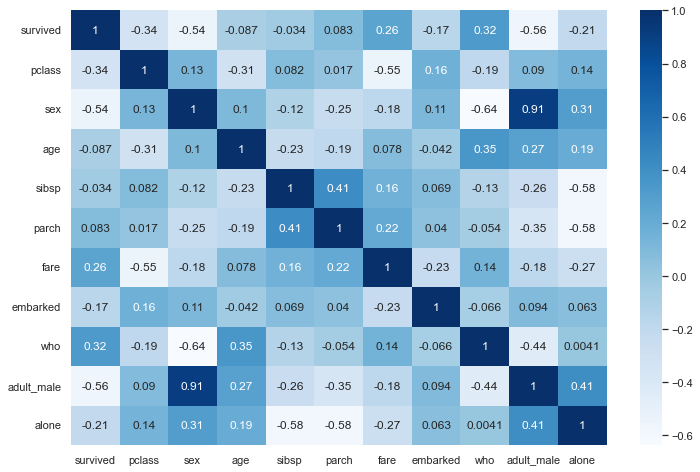

In [96]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap="Blues")

In [98]:
rfe = fs.RFE(model, n_features_to_select=4)
rfe = rfe.fit(X_train, y_train)
print("Support = ", rfe.support_)
print("Ranking = ", rfe.ranking_)

Support =  [ True False  True False False  True False False  True False]
Ranking =  [1 3 1 4 5 1 6 2 1 7]


<AxesSubplot:>

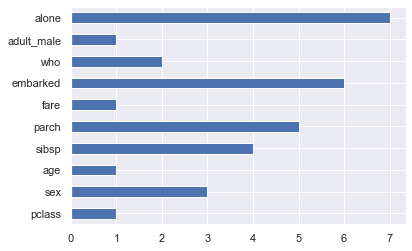

In [101]:
pd.Series(rfe.ranking_, X.columns).plot(kind="barh")